# Data cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('assignment_3_data.csv')

In [2]:
df.head()

,x0,x1,x34,x35,x36,x41,x45,x46,x68,x84,x93,x94
0,0.196063,3.683995,tesla,thurday,-4.664154,$124.72,-0.01%,14.360555,Jun,-11.072770,asia,0.023357
1,23.155197,-9.226725,Toyota,thur,5.220242,"$1,273.04",-0.01%,0.328324,July,4.601376,asia,1.349389
2,-13.969618,-0.343978,bmw,wednesday,-0.061424,"($1,651.19)",0.00%,3.824882,Aug,17.351746,asia,2.149993
3,49.722481,-1.500789,Toyota,wed,1.908461,$896.05,0.01%,-6.201024,Aug,6.084073,asia,-3.052037
4,-13.494403,7.445215,Honda,wednesday,0.074133,"($1,710.27)",0.01%,-12.547338,May,10.035783,asia,-0.100660


## Task 1: Create consistency in data and correct strings

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      999 non-null    float64
 1   x1      999 non-null    float64
 2   x34     999 non-null    object 
 3   x35     999 non-null    object 
 4   x36     999 non-null    float64
 5   x41     999 non-null    object 
 6   x45     998 non-null    object 
 7   x46     999 non-null    float64
 8   x68     999 non-null    object 
 9   x84     999 non-null    float64
 10  x93     999 non-null    object 
 11  x94     999 non-null    float64
dtypes: float64(6), object(6)
memory usage: 93.8+ KB


<font color='blue'>We note that columns 'x41' and 'x45' are 'objects' but should be numeric types (e.g. 'float64'). There is also missing value in 'x45' that must be filled in.</font>

## Convert columns 'x41' and 'x45' to numeric types 'float64'

### Remove non-numeric characters, convert, and test

In [4]:
df['x41'] = df['x41'].apply(lambda x: x.replace('(', '-'))
df['x41'] = df['x41'].apply(lambda x: x.replace(')', ''))
df['x41'] = df['x41'].apply(lambda x: x.replace('$', ''))
df['x41'] = df['x41'].apply(lambda x: x.replace(',', ''))

In [5]:
df['x41'] = pd.to_numeric(df['x41'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      999 non-null    float64
 1   x1      999 non-null    float64
 2   x34     999 non-null    object 
 3   x35     999 non-null    object 
 4   x36     999 non-null    float64
 5   x41     999 non-null    float64
 6   x45     998 non-null    object 
 7   x46     999 non-null    float64
 8   x68     999 non-null    object 
 9   x84     999 non-null    float64
 10  x93     999 non-null    object 
 11  x94     999 non-null    float64
dtypes: float64(7), object(5)
memory usage: 93.8+ KB


### Repeat for column 'x45'

<font color='blue'>Our apply function fails if we try to run it because we are missing a value in one of the rows. We define a function that removes any '%' in the cell and returns the appropriate value.</font>

In [7]:
def percent_replace(x):
    try:
        return x.replace('%', '')
    except:            
        if x == np.NaN:
            return np.NaN
        else: 
            return x   

df['x45'] = df['x45'].apply(percent_replace)

In [8]:
tb = df['x45'].isnull() 
df['x45'][tb]

879    NaN
Name: x45, dtype: object

In [9]:
df['x45'] = pd.to_numeric(df['x45'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      999 non-null    float64
 1   x1      999 non-null    float64
 2   x34     999 non-null    object 
 3   x35     999 non-null    object 
 4   x36     999 non-null    float64
 5   x41     999 non-null    float64
 6   x45     998 non-null    float64
 7   x46     999 non-null    float64
 8   x68     999 non-null    object 
 9   x84     999 non-null    float64
 10  x93     999 non-null    object 
 11  x94     999 non-null    float64
dtypes: float64(8), object(4)
memory usage: 93.8+ KB


<font color='blue'>Problem solved, but we still need to fix the missing value. Let's replace the missing value with something that won't change the shape of the data</font>

In [11]:
df['x45'].describe()

count    998.000000
mean      -0.000050
std        0.010384
min       -0.030000
25%       -0.010000
50%        0.000000
75%        0.010000
max        0.030000
Name: x45, dtype: float64

<font color='blue'>The mean of column 'x45' is trivially less than 0, so we are safe to just fill in the empty cell with 0</font>

In [12]:
df['x45'].fillna(value = 0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      999 non-null    float64
 1   x1      999 non-null    float64
 2   x34     999 non-null    object 
 3   x35     999 non-null    object 
 4   x36     999 non-null    float64
 5   x41     999 non-null    float64
 6   x45     999 non-null    float64
 7   x46     999 non-null    float64
 8   x68     999 non-null    object 
 9   x84     999 non-null    float64
 10  x93     999 non-null    object 
 11  x94     999 non-null    float64
dtypes: float64(8), object(4)
memory usage: 93.8+ KB


<font color='blue'>Success! x41 and x45 are now numeric objects! There are no missing values</font>

## For the string columns, fix spelling and remove variations of equivalent values (i.e. collapse "Thurs" and "Thursday" to a single value)

In [14]:
df

,x0,x1,x34,x35,x36,x41,x45,x46,x68,x84,x93,x94
0,0.196063,3.683995,tesla,thurday,-4.664154,124.72,-0.01,14.360555,Jun,-11.072770,asia,0.023357
1,23.155197,-9.226725,Toyota,thur,5.220242,1273.04,-0.01,0.328324,July,4.601376,asia,1.349389
2,-13.969618,-0.343978,bmw,wednesday,-0.061424,-1651.19,0.00,3.824882,Aug,17.351746,asia,2.149993
3,49.722481,-1.500789,Toyota,wed,1.908461,896.05,0.01,-6.201024,Aug,6.084073,asia,-3.052037
4,-13.494403,7.445215,Honda,wednesday,0.074133,-1710.27,0.01,-12.547338,May,10.035783,asia,-0.100660
...,...,...,...,...,...,...,...,...,...,...,...,...
994,18.373405,-7.902737,volkswagon,wed,-3.651558,-1520.19,0.00,-4.009639,Oct,8.519576,asia,-0.790982
995,55.762861,-11.687225,bmw,thurday,3.204393,687.44,-0.02,-13.827186,July,4.745582,asia,2.529016
996,-8.957643,11.970364,Honda,wednesday,0.309493,419.60,0.00,2.905907,May,-0.643147,asia,0.600268
997,5.887040,5.370001,volkswagon,thurday,-3.700755,-1214.32,-0.01,3.089698,July,-5.489663,euorpe,1.017123


<font color='blue'>Columns 'x34', 'x35', 'x68', and 'x93' are object-types (strings). Let's start by identifying the unique values in each column and looking for inconsistancies.</font> 

## column x34

In [15]:
pd.unique(df['x34'])

array(['tesla', 'Toyota', 'bmw', 'Honda', 'ford', 'volkswagon',
       'chrystler', 'nissan', 'mercades', 'chevrolet'], dtype=object)

<font color='blue'>Fortunately, there are no variations of a single value to fix, but there are spelling and capitalization errors to fix.</font>

In [16]:
df['x34'] = df['x34'].apply(lambda x: x.title())
df['x34'] = df['x34'].apply(lambda x: x.replace('Chrystler', 'Chrysler'))
df['x34'] = df['x34'].apply(lambda x: x.replace('Bmw', 'BMW'))
df['x34'] = df['x34'].apply(lambda x: x.replace('Volkswagon', 'Volkswagen'))
df['x34'] = df['x34'].apply(lambda x: x.replace('Mercades', 'Mercedes'))
pd.unique(df['x34'])

array(['Tesla', 'Toyota', 'BMW', 'Honda', 'Ford', 'Volkswagen',
       'Chrysler', 'Nissan', 'Mercedes', 'Chevrolet'], dtype=object)

## column x35

In [17]:
pd.unique(df['x35'])

array(['thurday', 'thur', 'wednesday', 'wed', 'tuesday', 'monday',
       'friday', 'fri'], dtype=object)

In [18]:
df['x35'] = df['x35'].apply(lambda x: x.title())
df['x35'] = df['x35'].apply(lambda x: x.replace('Thurday', 'Thursday'))
df['x35'] = df['x35'].apply(lambda x: x.replace('Thur', 'Thursday') if len(x) == 4 else x) 
df['x35'] = df['x35'].apply(lambda x: x.replace('Wed', 'Wednesday') if len(x) == 3 else x)
df['x35'] = df['x35'].apply(lambda x: x.replace('Fri', 'Friday') if len(x) == 3 else x)
pd.unique(df['x35'])

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday'],
      dtype=object)

<font color='blue'>Note: the above if/else statements ensure that only the abbreviated strings are changed, i.e. we don't convert 'Thursday' to 'ThurThursday', etc.</font>

## column x68

In [19]:
pd.unique(df['x68'])

array(['Jun', 'July', 'Aug', 'May', 'Apr', 'sept.', 'Oct', 'Dev', 'Mar',
       'Nov'], dtype=object)

In [20]:
df['x68'] = df['x68'].apply(lambda x: x.replace('July', 'Jul'))
df['x68'] = df['x68'].apply(lambda x: x.replace('sept.', 'Sep'))
df['x68'] = df['x68'].apply(lambda x: x.replace('Dev', 'Nov'))
pd.unique(df['x68'])

array(['Jun', 'Jul', 'Aug', 'May', 'Apr', 'Sep', 'Oct', 'Nov', 'Mar'],
      dtype=object)

## column x93

In [21]:
pd.unique(df['x93'])

array(['asia', 'america', 'euorpe'], dtype=object)

In [22]:
df['x93'] = df['x93'].apply(lambda x: x.replace('euorpe', 'europe'))
df['x93'] = df['x93'].apply(lambda x: x.title())
pd.unique(df['x93'])

array(['Asia', 'America', 'Europe'], dtype=object)

# Task 2: Check for skew and transform data where necessary

array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x36'}>],
       [<AxesSubplot:title={'center':'x41'}>,
        <AxesSubplot:title={'center':'x45'}>,
        <AxesSubplot:title={'center':'x46'}>],
       [<AxesSubplot:title={'center':'x84'}>,
        <AxesSubplot:title={'center':'x94'}>, <AxesSubplot:>]],
      dtype=object)

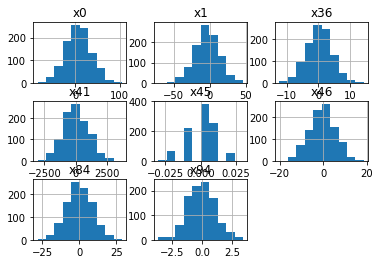

In [23]:
df.hist()

<font color='blue'>x45 looks strange but this is because the default number of bins for the histogram is 10, whereas x45 only has 7 unique values. The histogram looks fine when we set the bins to 7</font>

In [24]:
pd.unique(df['x45'])

array([-0.01,  0.  ,  0.01,  0.02, -0.02, -0.03,  0.03])

<AxesSubplot:>

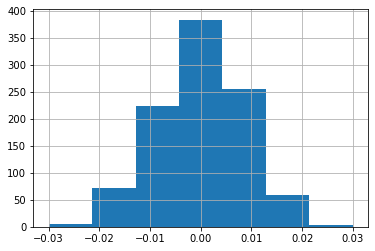

In [25]:
df['x45'].hist(bins=7)

<font color='blue'>The histograms reveal that the data is "approximately symmetrical" for all numeric columns. The skew calculations confirm the visual evaluation, with no skew outside the range [-0.5, 0.5] (see "rule of thumb" for characterizing symmetrical data at https://brownmath.com/stat/shape.htm) </font>

In [26]:
df.skew(numeric_only=True)

x0     0.016471
x1    -0.017563
x36   -0.040221
x41    0.134217
x45   -0.124713
x46   -0.033025
x84    0.050609
x94    0.040699
dtype: float64

# Task 3: Identify any correlations that may exist

In [27]:
bool_tab_correlation = (df.corr()>0.5) | (df.corr()<-0.5)
bool_tab_correlation 

,x0,x1,x36,x41,x45,x46,x84,x94
x0,True,False,False,False,False,False,False,False
x1,False,True,False,False,False,False,False,False
x36,False,False,True,False,False,False,False,False
x41,False,False,False,True,False,False,False,False
x45,False,False,False,False,True,False,False,False
x46,False,False,False,False,False,True,False,False
x84,False,False,False,False,False,False,True,False
x94,False,False,False,False,False,False,False,True


<font color='blue'>In class, it was recommended to only consider correlations outside of range (-0.5, 0.5). According to the above table, none of the columns pass that threshold when compared to other columns</font> 

# Task 4: Output cleaned data and submit

In [28]:
df.to_csv('BRoddey_wk5_assignment_data_cleaned.csv')